# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Spring 2023
- Instructor: Tom Bihari
- Section: Wednesday/Friday 9:35AM or 12:45PM  (CHOOSE)
- Student Name: John Smith
- Student Email: smith.12345@osu.edu
- Student ID: 123456789

Template Version V6.
***

***
# Section: Overview

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
1.	Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
2.	Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

- The file **small_Xydf.csv** is a two-dimensional dataset with 200 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large1_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large2_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you should work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams!

### What You Need to Turn In:

1.	Code
-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2.	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### How to Turn In Your Work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit your Jupyter Noebook to Carmen - do not ZIP or PDF it. You do not need to include the input data.

### Grading:

0.	Overall readability and organization of your report (10%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
1.	Evaluation of the KNN Clustering Algorithm on the Small Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
2.	Evaluation of the KNN Clustering Algorithm on the Large1 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3.	Evaluation of the KNN Clustering Algorithm on the Large2 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4.	Evaluation of the Second Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5.	Evaluation of the Third Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
6.	Comparison of the Three Clustering Algorithms (10%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
7.	Conclusions (5%) – Did you document your overall insights? 

### Instructions and Helpful Hints:
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Consider creating re-usable functions for some common operations - you will be doing the same sorts of things multiple times below.
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.

### References and Acknowledgements:

1.	https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2.	https://scikit-learn.org/stable/modules/clustering.html
3.	https://docs.python.org/3/library/time.html
4.	https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5.	https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [23]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=120)

In [24]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own visualizations.
def plot_clusters(title, X, y, size):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(size,size))
    plt.title(title)
    plt.xlabel("X0") 
    plt.ylabel("X1")
    plt.scatter(X[:, 0], X[:, 1], s = 40, c = y[:]) 
    plt.show()
    plt.clf()

In [25]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own.
def remap_cluster_labels(true_y, pred_y):
    # Rearrange the predicted cluster labels so they best match the true ones.
    # This function takes the true and predicted labels and returns the remapped predicted labels.
    # Situation: A clustering algorithm returns a set of cluster labels.  These labels typically will not be the same as the
    # true cluster labels (because the algorithm does not know anything about the true labels).  For example, the algorithm
    # may return (2,1,2,0,1,0,...) while the true labels are (0,2,0,1,2,1,...). Therefore it is necessary remap 2->0, 1->2,
    # and 0->1 when evaluating the quality of the algorithm.
    # Note: This code has not been tested for cases where there are negative cluster numbers (e.g., -1 for DbScan)
    #       or for cases where the true_y and pred_y matrices are of different lengths.
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
    from scipy.optimize import linear_sum_assignment

    conf_mat = confusion_matrix(true_y, pred_y)  #SciKitLearn convention is rows are true labels, cols are predicted labels
    
    # Find the optimal remapping of labels, so the predicted labels best match the true labels.
    # col_index is the predicted label; row_index is the true label to change it to.
    
    # Negate the costs so maximizing the assignment minimizes the mismatches
    row_index, col_index = linear_sum_assignment(conf_mat.max()-conf_mat)

    # Remap the predicted labels.
    new_pred_y = np.zeros(len(pred_y))
    for r in range(0,len(row_index)):
        old = col_index[r]  # the predicted y's
        new = row_index[r]  # remap to the corresponding true y's
        new_pred_y[pred_y == old] = new

    return new_pred_y  # return the remapped labels

In [26]:
# # SUGGESTION - consider creating functions like these, if you choose.
# def compute_single_sse(my_df):  # For a Pandas DataFrame - Columns are X0, X1
#     ...
#     return my_SSE

# def compute_all_sse(my_df):  # For a Pandas DataFrame - Columns are X0, X1, y
#     ...
#     return sum_WSS, overall_SSE-sum_WSS, overall_SSE    #Total (overall) SSE is the sum of BSS and WSS

# def compute_all_sse_from_Xy(X, y):  # For NumPy arrays
#     ...
#     return compute_all_sse(my_df)

In [27]:
# SUGGESTION - consider creating a function to print the evaluation results of the clustering, if you choose.
def print_evaluation_results(title_string, show_true, show_pred, X, true_y, pred_y, running_time):
    # Print plots, WSS, BSS, total SSE, accuracy, confusion matrix, classification report, accuracy, running time, etc.
    # ...
    print(title_string)

In [28]:
def evaluate_clustering(X, true_y, n_clusters):
    # KMeans clustering
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    end_time = time.time()
    labels = kmeans.labels_

    # Plot the data and the clustering results
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    ax.set_title(f'KMeans Clustering (n_clusters={n_clusters})')
    plt.show()

    # Within-cluster sum of squares (WSS)
    wss = kmeans.inertia_

    # Between-cluster sum of squares (BSS)
    bss = np.sum([np.sum((X[labels == i, :] - kmeans.cluster_centers_[i, :]) ** 2) for i in range(n_clusters)])

    # Total sum of squares (TSS)
    tss = np.sum((X - np.mean(X, axis=0)) ** 2)

    # Total sum of squared errors (SSE)
    sse = tss - bss

    # Accuracy
    acc = accuracy_score(true_y, labels)

    # Confusion matrix and classification report
    cm = confusion_matrix(true_y, labels)
    cr = classification_report(true_y, labels)

    # Print the evaluation metrics
    print(f'Number of clusters: {n_clusters}')
    print(f'Within-cluster sum of squares (WSS): {wss:.2f}')
    print(f'Between-cluster sum of squares (BSS): {bss:.2f}')
    print(f'Total sum of squares (TSS): {tss:.2f}')
    print(f'Total sum of squared errors (SSE): {sse:.2f}')
    print(f'Accuracy: {acc:.2f}')
    print('Confusion matrix:\n', cm)
    print('Classification report:\n', cr)
    print(f'Running time: {end_time - start_time:.2f} seconds')


***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
- Print all of the evaluation results.
***

In [29]:
small_data = pd.read_csv('../Homework4/small_Xydf.csv')
X = small_data[['X0','X1']].to_numpy()
true_y = small_data['y'].to_numpy()

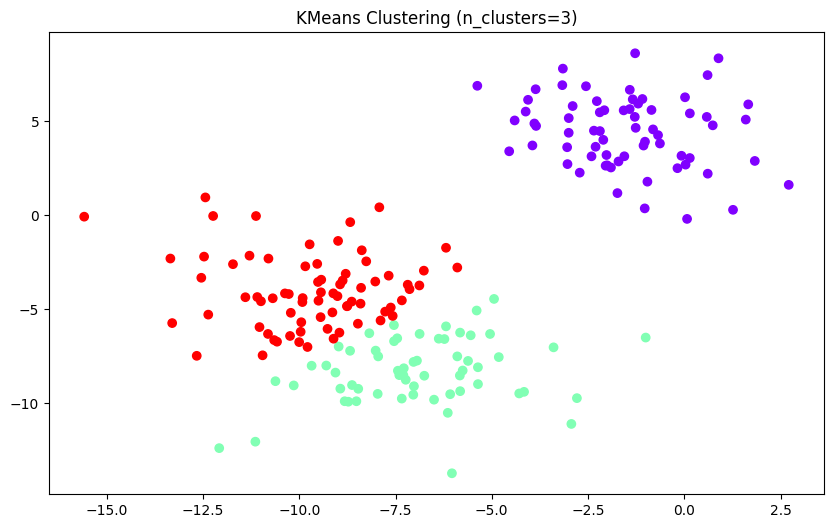

Number of clusters: 3
Within-cluster sum of squares (WSS): 1368.75
Between-cluster sum of squares (BSS): 1368.75
Total sum of squares (TSS): 9158.82
Total sum of squared errors (SSE): 7790.06
Accuracy: 0.41
Confusion matrix:
 [[67  0  0]
 [ 0  5 62]
 [ 0 55 11]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.08      0.07      0.08        67
           2       0.15      0.17      0.16        66

    accuracy                           0.41       200
   macro avg       0.41      0.41      0.41       200
weighted avg       0.41      0.41      0.41       200

Running time: 0.03 seconds


In [30]:
evaluate_clustering(X, true_y, n_clusters=3)

***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

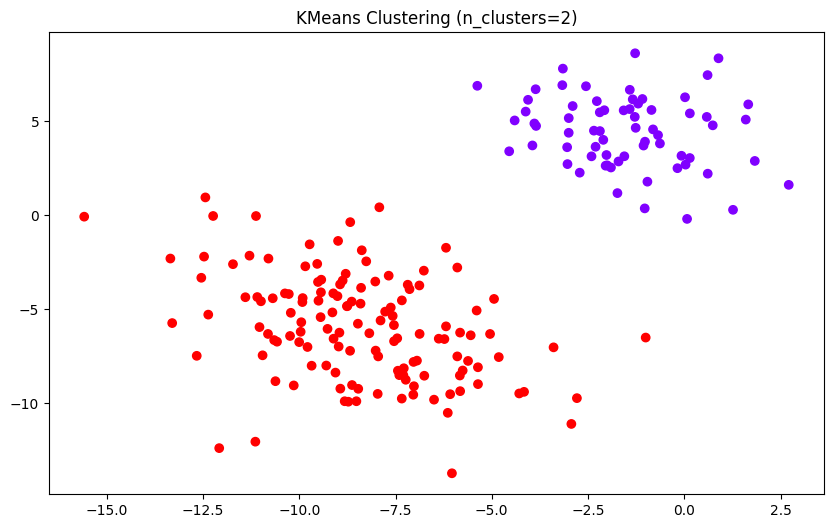

Number of clusters: 2
Within-cluster sum of squares (WSS): 2222.18
Between-cluster sum of squares (BSS): 2222.18
Total sum of squares (TSS): 9158.82
Total sum of squared errors (SSE): 6936.63
Accuracy: 0.67
Confusion matrix:
 [[67  0  0]
 [ 0 67  0]
 [ 0 66  0]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.50      1.00      0.67        67
           2       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.50      0.67      0.56       200
weighted avg       0.50      0.67      0.56       200

Running time: 0.03 seconds


In [31]:
evaluate_clustering(X, true_y, n_clusters=2)

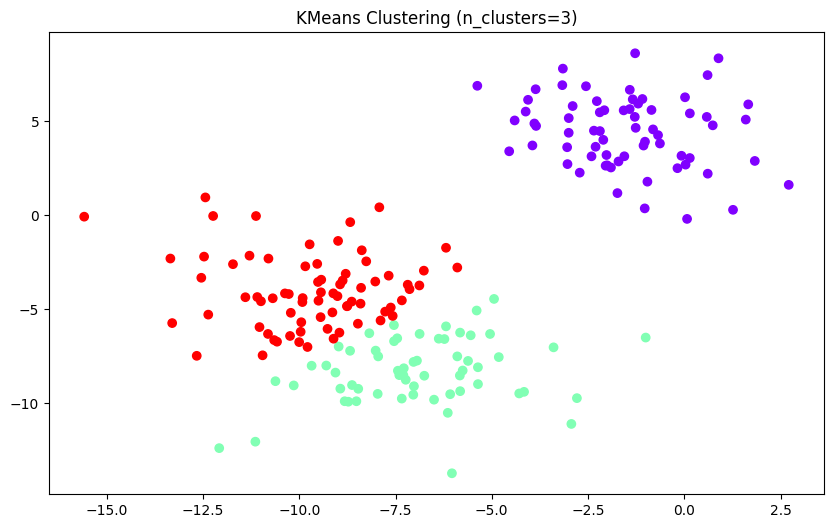

Number of clusters: 3
Within-cluster sum of squares (WSS): 1368.75
Between-cluster sum of squares (BSS): 1368.75
Total sum of squares (TSS): 9158.82
Total sum of squared errors (SSE): 7790.06
Accuracy: 0.41
Confusion matrix:
 [[67  0  0]
 [ 0  5 62]
 [ 0 55 11]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.08      0.07      0.08        67
           2       0.15      0.17      0.16        66

    accuracy                           0.41       200
   macro avg       0.41      0.41      0.41       200
weighted avg       0.41      0.41      0.41       200

Running time: 0.03 seconds


In [32]:
evaluate_clustering(X, true_y, n_clusters=3)

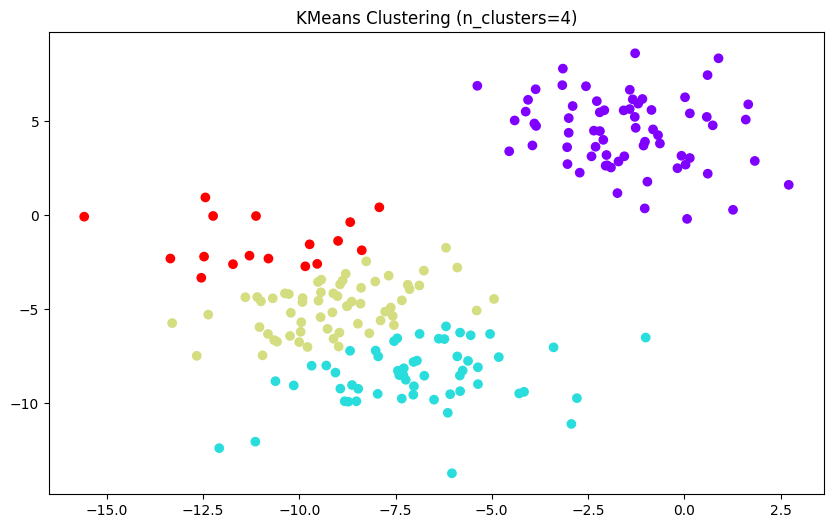

Number of clusters: 4
Within-cluster sum of squares (WSS): 1171.09
Between-cluster sum of squares (BSS): 1171.09
Total sum of squares (TSS): 9158.82
Total sum of squared errors (SSE): 7987.72
Accuracy: 0.43
Confusion matrix:
 [[67  0  0  0]
 [ 0  4 46 17]
 [ 0 51 15  0]
 [ 0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.07      0.06      0.07        67
           2       0.25      0.23      0.24        66
           3       0.00      0.00      0.00         0

    accuracy                           0.43       200
   macro avg       0.33      0.32      0.33       200
weighted avg       0.44      0.43      0.43       200

Running time: 0.03 seconds


In [33]:
evaluate_clustering(X, true_y, n_clusters=4)

***
## Section: 1.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [34]:
large_data1 = pd.read_csv('../Homework4/large1_Xydf.csv')
X = large_data1[['X0','X1']].to_numpy()
true_y = large_data1['y'].to_numpy()

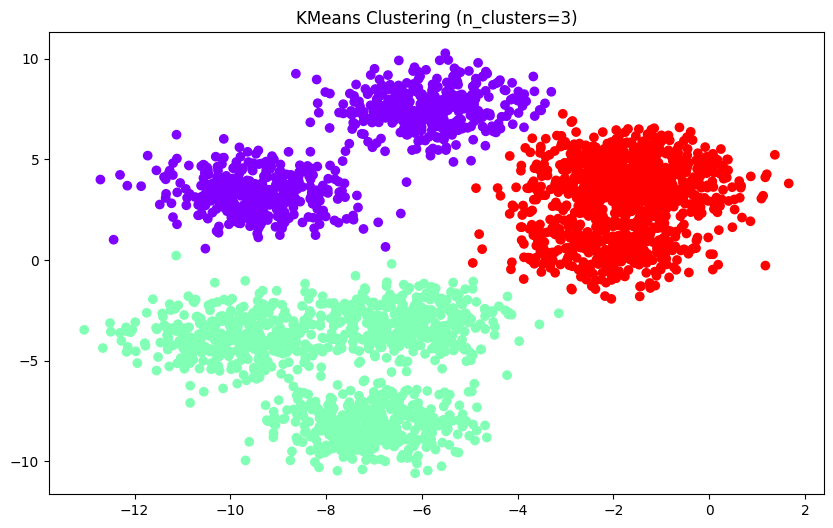

Number of clusters: 3
Within-cluster sum of squares (WSS): 23010.02
Between-cluster sum of squares (BSS): 23010.02
Total sum of squares (TSS): 108019.19
Total sum of squared errors (SSE): 85009.18
Accuracy: 0.13
Confusion matrix:
 [[  2   0 373   0   0   0   0   0]
 [  0 375   0   0   0   0   0   0]
 [  0 375   0   0   0   0   0   0]
 [  1 374   0   0   0   0   0   0]
 [  0   0 375   0   0   0   0   0]
 [  1   0 374   0   0   0   0   0]
 [371   0   4   0   0   0   0   0]
 [374   1   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.01      0.00       375
           1       0.33      1.00      0.50       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.

In [35]:
evaluate_clustering(X, true_y, n_clusters=3)

***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

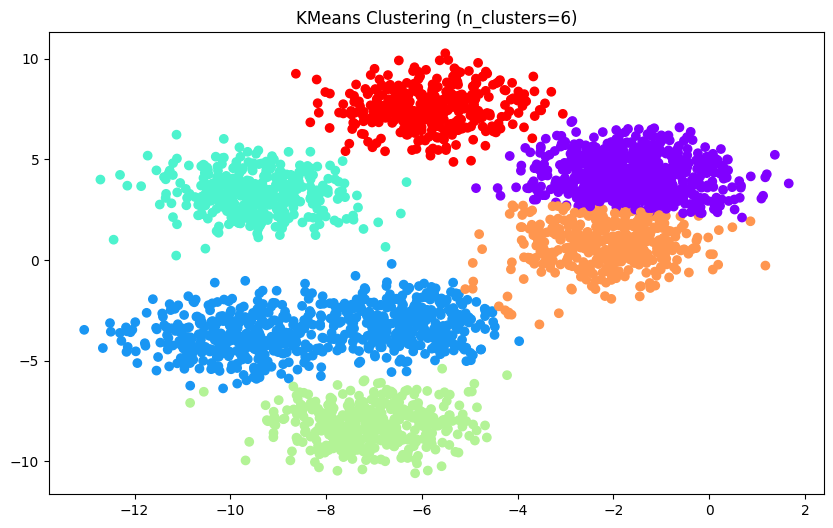

Number of clusters: 6
Within-cluster sum of squares (WSS): 8333.05
Between-cluster sum of squares (BSS): 8333.05
Total sum of squares (TSS): 108019.19
Total sum of squared errors (SSE): 99686.14
Accuracy: 0.36
Confusion matrix:
 [[360   0   0   0  13   2   0   0]
 [  0 371   0   4   0   0   0   0]
 [  0   3   0 372   0   0   0   0]
 [  0 362   1   1  11   0   0   0]
 [ 22   0   0   0 353   0   0   0]
 [336   0   0   0  37   2   0   0]
 [  3   0   1   0   0 371   0   0]
 [  0   0 374   0   0   1   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.96      0.66       375
           1       0.50      0.99      0.67       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.85      0.94      0.89       375
           5       0.01      0.01      0.01       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00

In [36]:
evaluate_clustering(X, true_y, n_clusters=6)

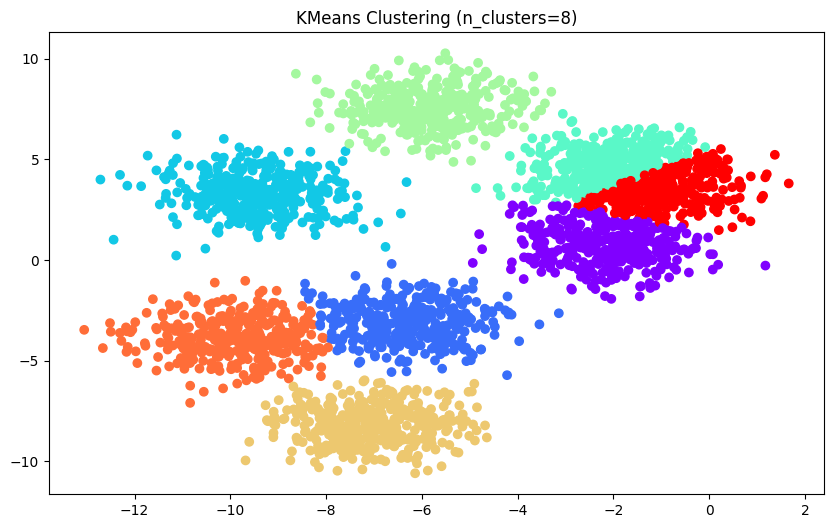

Number of clusters: 8
Within-cluster sum of squares (WSS): 5225.93
Between-cluster sum of squares (BSS): 5225.93
Total sum of squares (TSS): 108019.19
Total sum of squared errors (SSE): 102793.26
Accuracy: 0.01
Confusion matrix:
 [[ 10   0   0 229   2   0   0 134]
 [  0  10   0   0   0   2 363   0]
 [  0   2   0   0   0 371   2   0]
 [  0 362   1   0   0   0  12   0]
 [341   0   0   5   0   0   0  29]
 [ 22   0   0 153   1   0   0 199]
 [  0   0   1   4 370   0   0   0]
 [  0   0 375   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.03      0.03      0.03       375
           1       0.03      0.03      0.03       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.0

In [37]:
evaluate_clustering(X, true_y, n_clusters=8)

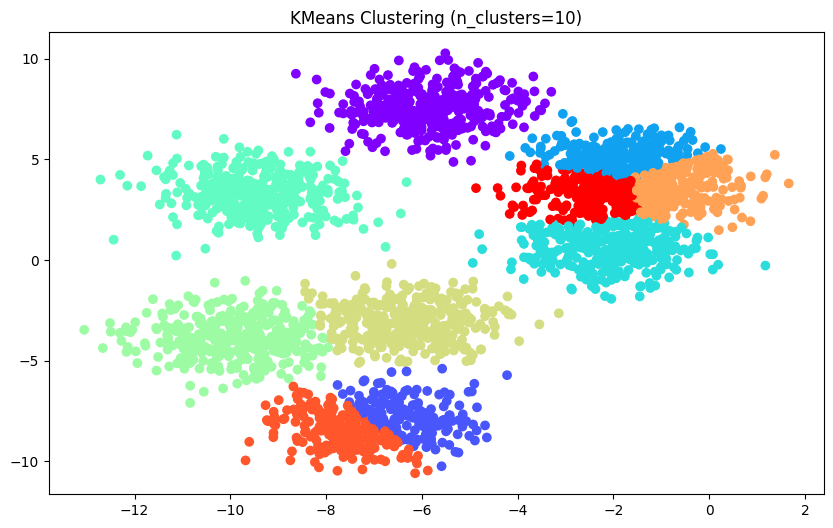

Number of clusters: 10
Within-cluster sum of squares (WSS): 4618.11
Between-cluster sum of squares (BSS): 4618.11
Total sum of squares (TSS): 108019.19
Total sum of squared errors (SSE): 103401.08
Accuracy: 0.00
Confusion matrix:
 [[  2   0 179   4   0   0   0 107   0  83]
 [  0   0   0   0   0 363  10   0   2   0]
 [  0 163   0   0   0   2   1   0 209   0]
 [  0   3   0   0   1  12 359   0   0   0]
 [  0   0   0 324   0   0   0  16   0  35]
 [  1   0  84  13   0   0   0 152   0 125]
 [370   0   4   0   1   0   0   0   0   0]
 [  1   0   0   0 374   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.01      0.01      0.01       375
           1       0.00      0.00      0.00       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00

In [38]:
evaluate_clustering(X, true_y, n_clusters=10)

***
## Section: 2.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [39]:
large_data2 = pd.read_csv('../Homework4/large2_Xydf.csv')
X = large_data2[['X0','X1']].to_numpy()
true_y = large_data1['y'].to_numpy()

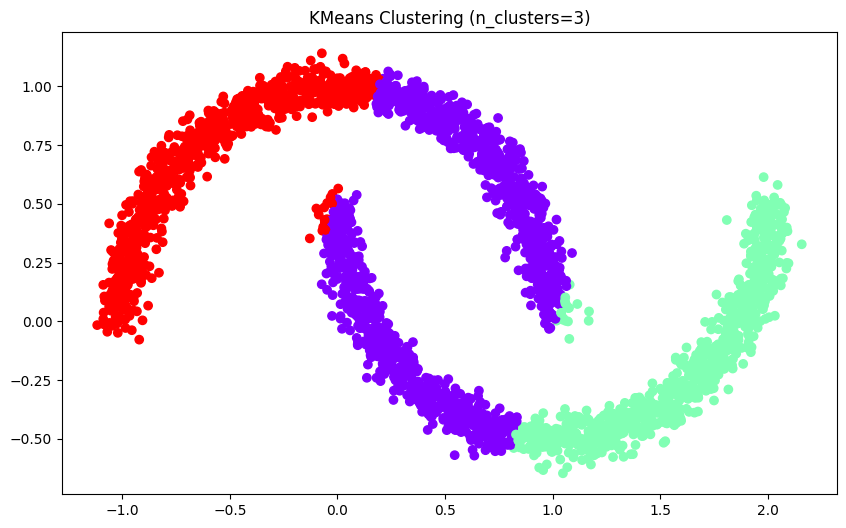

Number of clusters: 3
Within-cluster sum of squares (WSS): 806.69
Between-cluster sum of squares (BSS): 806.69
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 2197.97
Accuracy: 0.12
Confusion matrix:
 [[159 105 111   0   0   0   0   0]
 [164 112  99   0   0   0   0   0]
 [167 107 101   0   0   0   0   0]
 [162 114  99   0   0   0   0   0]
 [172  98 105   0   0   0   0   0]
 [161 104 110   0   0   0   0   0]
 [171 109  95   0   0   0   0   0]
 [142 103 130   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.12      0.42      0.19       375
           1       0.13      0.30      0.18       375
           2       0.12      0.27      0.16       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00     

In [40]:
evaluate_clustering(X, true_y, n_clusters=3)

***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

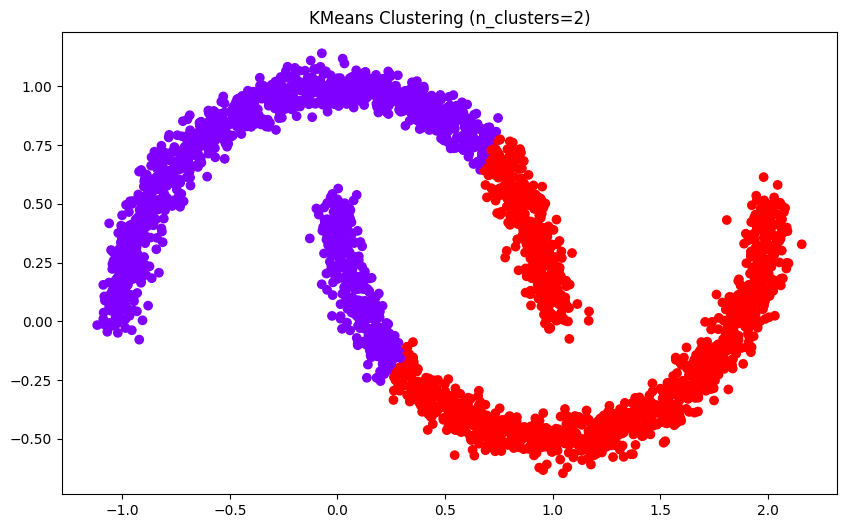

Number of clusters: 2
Within-cluster sum of squares (WSS): 1211.29
Between-cluster sum of squares (BSS): 1211.29
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 1793.37
Accuracy: 0.13
Confusion matrix:
 [[190 185   0   0   0   0   0   0]
 [177 198   0   0   0   0   0   0]
 [192 183   0   0   0   0   0   0]
 [164 211   0   0   0   0   0   0]
 [185 190   0   0   0   0   0   0]
 [193 182   0   0   0   0   0   0]
 [183 192   0   0   0   0   0   0]
 [196 179   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.13      0.51      0.20       375
           1       0.13      0.53      0.21       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00   

In [41]:
evaluate_clustering(X, true_y, n_clusters=2)

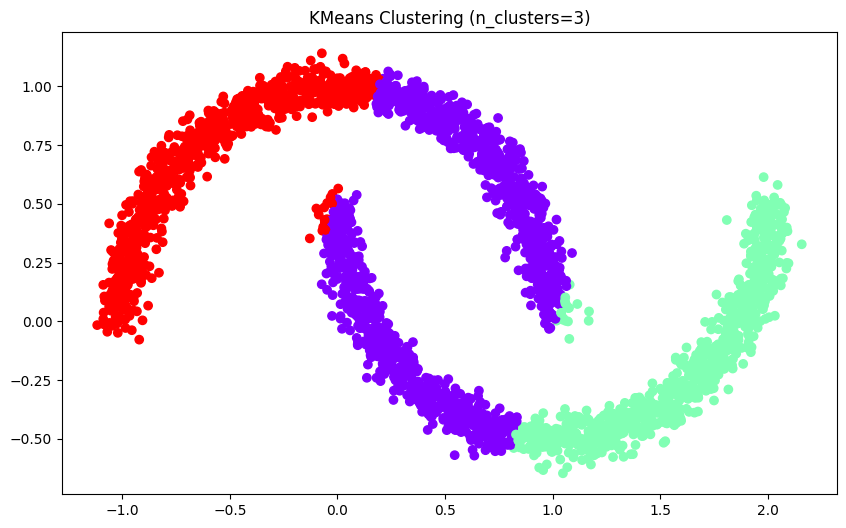

Number of clusters: 3
Within-cluster sum of squares (WSS): 806.69
Between-cluster sum of squares (BSS): 806.69
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 2197.97
Accuracy: 0.12
Confusion matrix:
 [[159 105 111   0   0   0   0   0]
 [164 112  99   0   0   0   0   0]
 [167 107 101   0   0   0   0   0]
 [162 114  99   0   0   0   0   0]
 [172  98 105   0   0   0   0   0]
 [161 104 110   0   0   0   0   0]
 [171 109  95   0   0   0   0   0]
 [142 103 130   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.12      0.42      0.19       375
           1       0.13      0.30      0.18       375
           2       0.12      0.27      0.16       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00     

In [42]:
evaluate_clustering(X, true_y, n_clusters=3)

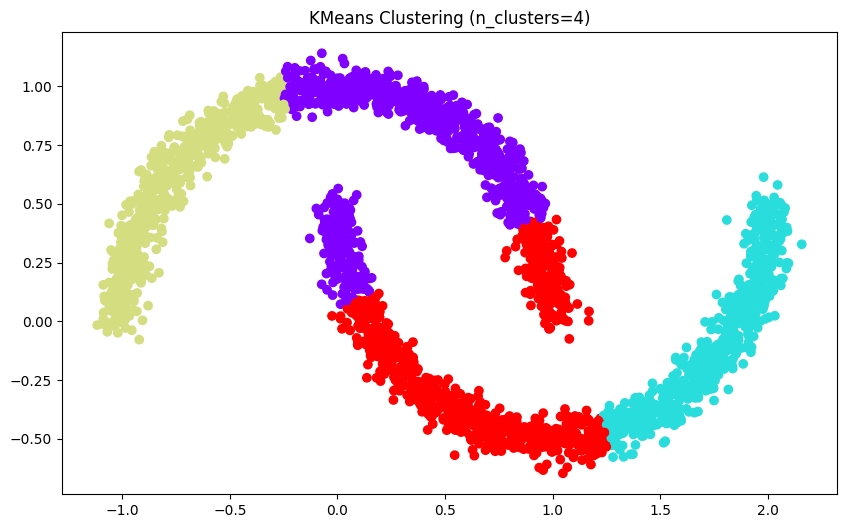

Number of clusters: 4
Within-cluster sum of squares (WSS): 524.10
Between-cluster sum of squares (BSS): 524.10
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 2480.56
Accuracy: 0.13
Confusion matrix:
 [[107  79  87 102   0   0   0   0]
 [110  88  70 107   0   0   0   0]
 [109  75  78 113   0   0   0   0]
 [104  83  75 113   0   0   0   0]
 [106  73  75 121   0   0   0   0]
 [108  83  88  96   0   0   0   0]
 [109  76  66 124   0   0   0   0]
 [ 94  77  98 106   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.13      0.29      0.18       375
           1       0.14      0.23      0.17       375
           2       0.12      0.21      0.15       375
           3       0.13      0.30      0.18       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00     

In [43]:
evaluate_clustering(X, true_y, n_clusters=4)

***
## Section: 3.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

In [62]:
large_data2 = pd.read_csv('../Homework4/large2_Xydf.csv')
X = large_data2[['X0','X1']].to_numpy()
true_y = large_data1['y'].to_numpy()

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

In [63]:
from sklearn.cluster import AgglomerativeClustering
def evaluate_Hierarchical_clustering(X, true_y, n_clusters):

    # Hierarchical Clustering
    start_time = time.time()
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(X)
    end_time = time.time()
    labels = agg_clustering.labels_

    # Plot the data and the clustering results
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    ax.set_title(f'Hierarchical Clustering (n_clusters={n_clusters})')
    plt.show()

    # Within-cluster sum of squares (WSS)
    wss = 0.0

    # Between-cluster sum of squares (BSS)
    bss = 0.0

    # Total sum of squares (TSS)
    tss = np.sum((X - np.mean(X, axis=0)) ** 2)

    # Total sum of squared errors (SSE)
    sse = tss - bss

    # Accuracy
    acc = accuracy_score(true_y, labels)

    # Confusion matrix and classification report
    cm = confusion_matrix(true_y, labels)
    cr = classification_report(true_y, labels)

    # Print the evaluation metrics
    print(f'Number of clusters: {n_clusters}')
    print(f'Within-cluster sum of squares (WSS): {wss:.2f}')
    print(f'Between-cluster sum of squares (BSS): {bss:.2f}')
    print(f'Total sum of squares (TSS): {tss:.2f}')
    print(f'Total sum of squared errors (SSE): {sse:.2f}')
    print(f'Accuracy: {acc:.2f}')
    print('Confusion matrix:\n', cm)
    print('Classification report:\n', cr)
    print(f'Running time: {end_time - start_time:.2f} seconds')


Hierarchical clustering

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

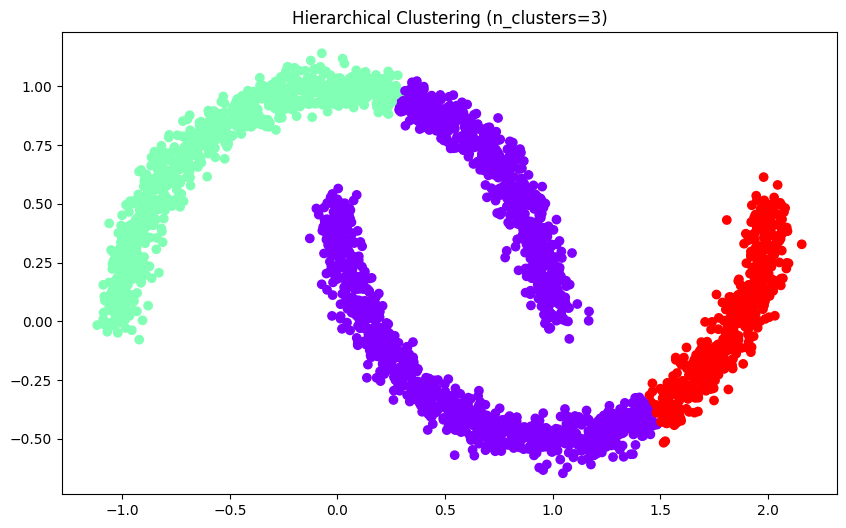

Number of clusters: 3
Within-cluster sum of squares (WSS): 0.00
Between-cluster sum of squares (BSS): 0.00
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 3004.66
Accuracy: 0.12
Confusion matrix:
 [[195 119  61   0   0   0   0   0]
 [202 103  70   0   0   0   0   0]
 [204 107  64   0   0   0   0   0]
 [211  99  65   0   0   0   0   0]
 [199 112  64   0   0   0   0   0]
 [190 116  69   0   0   0   0   0]
 [211 101  63   0   0   0   0   0]
 [182 133  60   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.12      0.52      0.20       375
           1       0.12      0.27      0.16       375
           2       0.12      0.17      0.14       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00      0.0

In [64]:
evaluate_Hierarchical_clustering(X, true_y, 3)

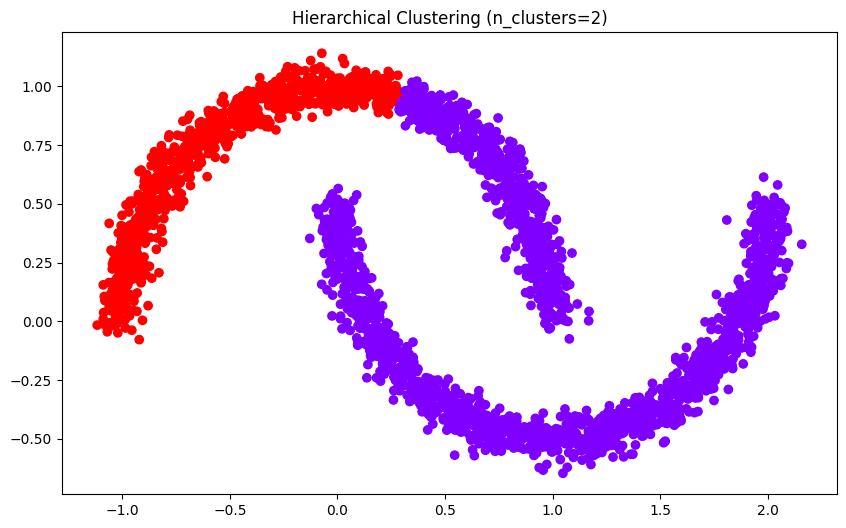

Number of clusters: 2
Within-cluster sum of squares (WSS): 0.00
Between-cluster sum of squares (BSS): 0.00
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 3004.66
Accuracy: 0.12
Confusion matrix:
 [[256 119   0   0   0   0   0   0]
 [272 103   0   0   0   0   0   0]
 [268 107   0   0   0   0   0   0]
 [276  99   0   0   0   0   0   0]
 [263 112   0   0   0   0   0   0]
 [259 116   0   0   0   0   0   0]
 [274 101   0   0   0   0   0   0]
 [242 133   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.12      0.68      0.21       375
           1       0.12      0.27      0.16       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00      0.0

In [89]:
evaluate_Hierarchical_clustering(X, true_y, 2)

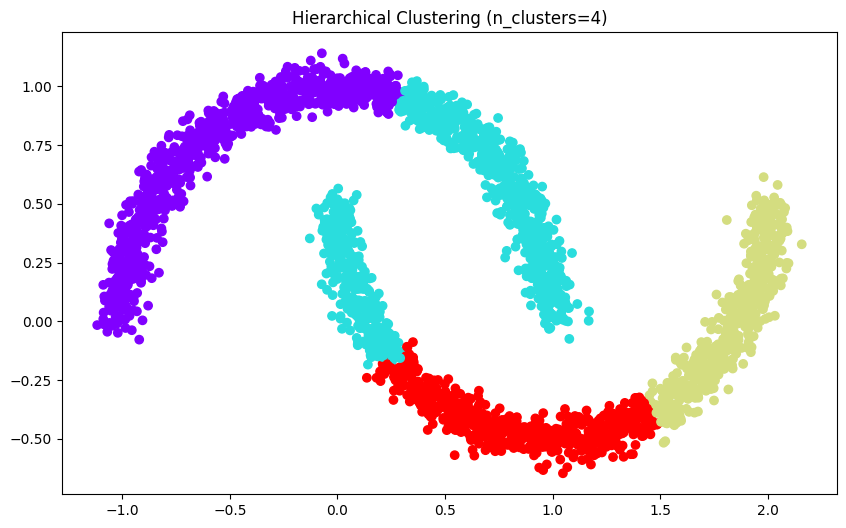

Number of clusters: 4
Within-cluster sum of squares (WSS): 0.00
Between-cluster sum of squares (BSS): 0.00
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 3004.66
Accuracy: 0.13
Confusion matrix:
 [[119 113  61  82   0   0   0   0]
 [103 126  70  76   0   0   0   0]
 [107 126  64  78   0   0   0   0]
 [ 99 120  65  91   0   0   0   0]
 [112 120  64  79   0   0   0   0]
 [116 122  69  68   0   0   0   0]
 [101 123  63  88   0   0   0   0]
 [133 104  60  78   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.13      0.32      0.19       375
           1       0.13      0.34      0.19       375
           2       0.12      0.17      0.14       375
           3       0.14      0.24      0.18       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00      0.0

In [99]:
evaluate_Hierarchical_clustering(X, true_y, 4)

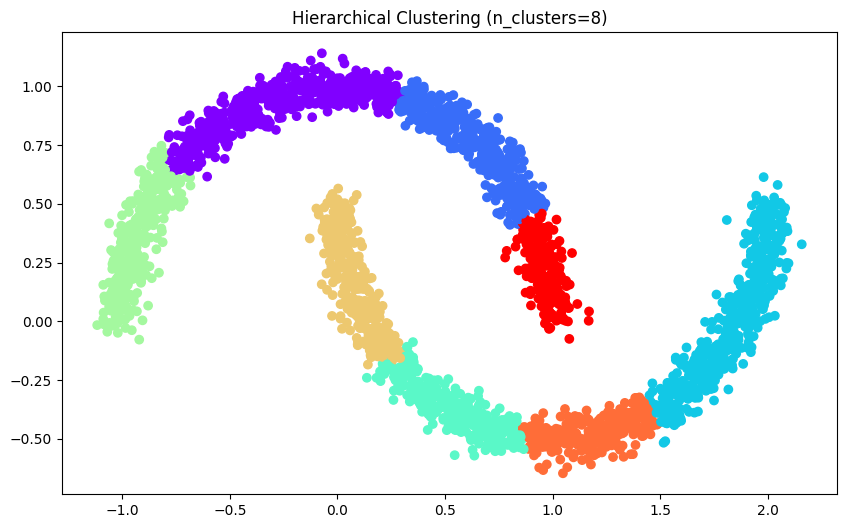

Number of clusters: 8
Within-cluster sum of squares (WSS): 0.00
Between-cluster sum of squares (BSS): 0.00
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 3004.66
Accuracy: 0.13
Confusion matrix:
 [[73 49 61 43 46 42 39 22]
 [66 55 70 39 37 41 37 30]
 [63 48 64 39 44 53 39 25]
 [57 52 65 48 42 38 43 30]
 [74 48 64 49 38 39 30 33]
 [67 56 69 36 49 42 32 24]
 [62 46 63 46 39 53 42 24]
 [85 38 60 41 48 36 37 30]]
Classification report:
               precision    recall  f1-score   support

           0       0.13      0.19      0.16       375
           1       0.14      0.15      0.14       375
           2       0.12      0.17      0.14       375
           3       0.14      0.13      0.13       375
           4       0.11      0.10      0.11       375
           5       0.12      0.11      0.12       375
           6       0.14      0.11      0.12       375
           7       0.14      0.08      0.10       375

    accuracy                           0.13      30

In [104]:
evaluate_Hierarchical_clustering(X, true_y, 8)

***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

In Hierarchical Clustering, the concepts of Within-cluster Sum of Squares (WSS) and Between-cluster Sum of Squares (BSS) are not applicable.

WSS is a measure of how tightly the data points in a cluster are packed together, and BSS is a measure of how well-separated the clusters are from each other. In KMeans clustering, WSS and BSS can be computed based on the cluster centers and the assignment of data points to those centers. However, in Hierarchical Clustering, the distance between data points and the linkage method used to form the clusters make the computation of WSS and BSS more complicated.

Therefore, we set the values of WSS and BSS to 0 when using Hierarchical Clustering, as they are not relevant measures for this clustering algorithm. However, other evaluation metrics such as the Total Sum of Squares (TSS), Total Sum of Squared Errors (SSE), and accuracy can still be calculated and used to evaluate the performance of the clustering algorithm.

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

In [105]:
large_data2 = pd.read_csv('../Homework4/large2_Xydf.csv')
X = large_data2[['X0','X1']].to_numpy()
true_y = large_data1['y'].to_numpy()

DB Scan

In [106]:
from sklearn.cluster import DBSCAN

def evaluate_DBScan(X, true_y, eps, min_samples):
    # DBSCAN clustering
    start_time = time.time()
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    end_time = time.time()
    labels = db.labels_

    # Plot the data and the clustering results
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    ax.set_title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()

    # Within-cluster sum of squares (WSS)
    wss = 0  # DBSCAN does not have a WSS metric

    # Between-cluster sum of squares (BSS)
    bss = 0  # DBSCAN does not have a BSS metric

    # Total sum of squares (TSS)
    tss = np.sum((X - np.mean(X, axis=0)) ** 2)

    # Total sum of squared errors (SSE)
    sse = tss - np.sum([np.sum((X[labels == i, :] - np.mean(X[labels == i, :], axis=0)) ** 2) for i in set(labels) - {-1}])

    # Accuracy
    acc = accuracy_score(true_y, labels)

    # Confusion matrix and classification report
    cm = confusion_matrix(true_y, labels)
    cr = classification_report(true_y, labels)

    # Print the evaluation metrics
    print(f'eps: {eps}')
    print(f'min_samples: {min_samples}')
    print(f'Total number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}')
    print(f'Number of noise points: {np.sum(labels == -1)}')
    print(f'Total sum of squares (TSS): {tss:.2f}')
    print(f'Total sum of squared errors (SSE): {sse:.2f}')
    print(f'Accuracy: {acc:.2f}')
    print('Confusion matrix:\n', cm)
    print('Classification report:\n', cr)
    print(f'Running time: {end_time - start_time:.2f} seconds')


***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

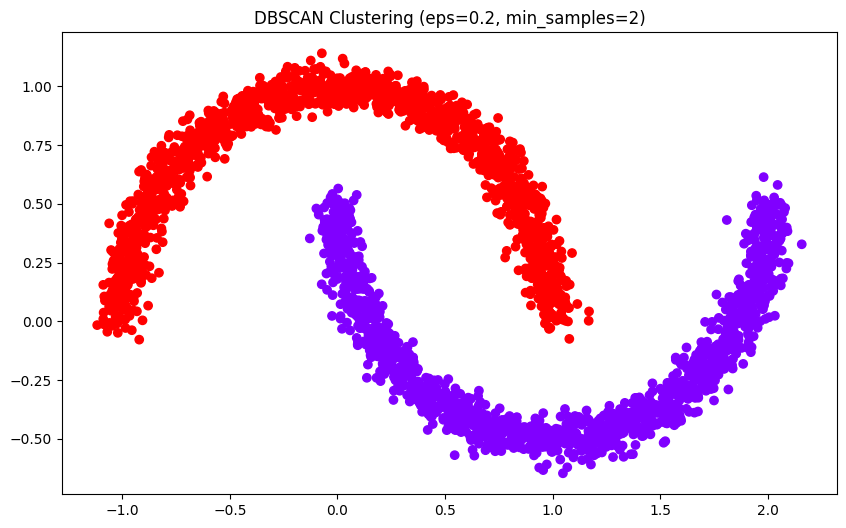

eps: 0.2
min_samples: 2
Total number of clusters: 2
Number of noise points: 0
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 1204.79
Accuracy: 0.12
Confusion matrix:
 [[185 190   0   0   0   0   0   0]
 [187 188   0   0   0   0   0   0]
 [195 180   0   0   0   0   0   0]
 [194 181   0   0   0   0   0   0]
 [182 193   0   0   0   0   0   0]
 [179 196   0   0   0   0   0   0]
 [204 171   0   0   0   0   0   0]
 [174 201   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.12      0.49      0.20       375
           1       0.13      0.50      0.20       375
           2       0.00      0.00      0.00       375
           3       0.00      0.00      0.00       375
           4       0.00      0.00      0.00       375
           5       0.00      0.00      0.00       375
           6       0.00      0.00      0.00       375
           7       0.00      0.00      0.00       375

    accuracy    

In [107]:
#eps = 0.2, sample size is 2
evaluate_DBScan(X, true_y, 0.2, 2)

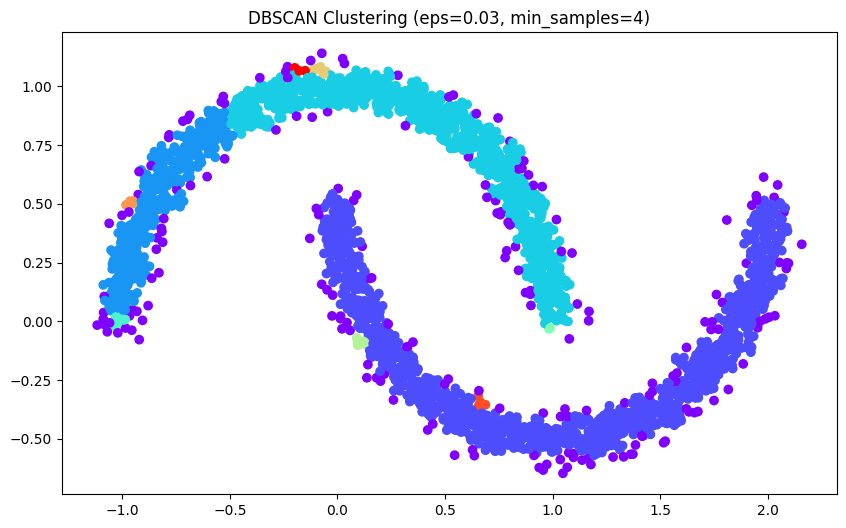

eps: 0.03
min_samples: 4
Total number of clusters: 10
Number of noise points: 196
Total sum of squares (TSS): 3004.66
Total sum of squared errors (SSE): 1848.52
Accuracy: 0.11
Confusion matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0]
 [ 22 169  63 115   2   2   0   0   0   2   0]
 [ 33 166  42 128   2   0   0   1   0   1   2]
 [ 18 188  54 111   2   0   0   1   1   0   0]
 [ 28 178  53 112   1   0   2   0   1   0   0]
 [ 21 167  52 131   0   0   1   2   0   1   0]
 [ 20 170  66 116   0   0   0   2   0   0   1]
 [ 27 185  50 108   1   1   2   0   1   0   0]
 [ 27 161  65 118   0   0   2   1   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]
Classification report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.12      0.45      0.19       375
           1       0.09      0.11      0.10       375
           2       0.12      0.30      0.17   

In [108]:
#eps = 0.03, sample size is 4
evaluate_DBScan(X, true_y, 0.03, 4)

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

eps is a parameter used in the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm, which is a clustering algorithm that groups together points that are closely packed together while marking points that lie alone in low-density regions as outliers or noise.

In the DBSCAN algorithm, eps represents the radius of a neighborhood around each point. Points that are within a distance eps of each other are considered neighbors and are placed in the same cluster. Points that are farther than eps are considered outliers or noise.

The value of eps can have a significant impact on the clustering results. A small value of eps may result in many small clusters or many points being marked as noise. A large value of eps may result in all points being placed in a single cluster. The optimal value of eps depends on the data being analyzed and must be chosen carefully.

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

***
### END-OF-SUBMISSION
***